# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [21]:
# Importamos las librerias necesarias
import os
from bs4 import BeautifulSoup
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

In [22]:
# Declaramos en una variable la pagina web a scrapear
url = 'https://companiesmarketcap.com/tesla/revenue/'

In [23]:
# Realizamos una petición GET al sitio web
response = requests.get(url)

# Comprobamos que la solicitud sea exitosa
if response.status_code == 200:
    # Leemos el html con BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

In [24]:
# Identificamos y accedemos a la información requerida
tabla = soup.find('script', string= lambda t: t and 'data =' in t)

if tabla:
    # Extraemos la cadena que contiene los datos json
    data = tabla.string.split('data =')[1].split(';')[0].strip()

    # Converertimos los datos json en datos python
    data = json.loads(data)

# Guardamos la información en un dataframe
df = pd.DataFrame(data.items(), columns= ['Año', 'Ganancias'])

In [25]:
df.head().T

,0,1,2,3,4
Año,2024,2023,2022,2021,2020
Ganancias,97150000000,96773000000,81462000000,53823000000,31536000000


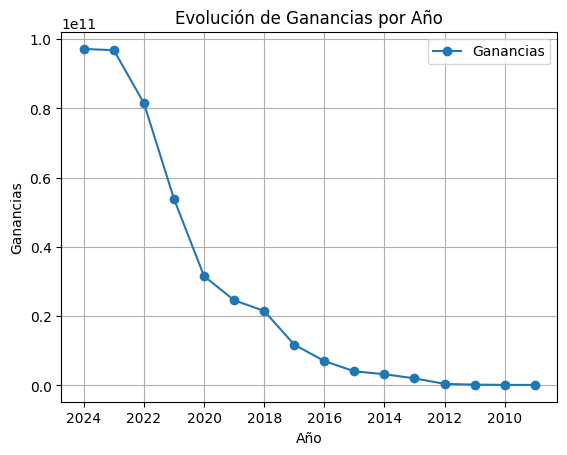

In [26]:
# Realizamos un gráfico de lineas de la data obtenida
df.plot(x='Año', y='Ganancias', kind='line', marker='o')
plt.title('Evolución de Ganancias por Año')
plt.xlabel('Año')
plt.ylabel('Ganancias')
plt.grid(True)
plt.show()

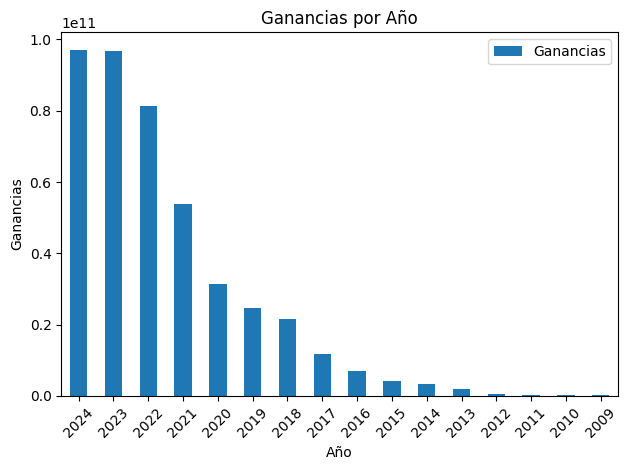

In [27]:
# Realizamos un gráfico de barras
df.plot(x='Año', y='Ganancias', kind='bar')
plt.title('Ganancias por Año')
plt.xlabel('Año')
plt.ylabel('Ganancias')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Como se aprecia en los gráficos realizados hay un incremento a medida que avanza los años destacando que los últimos 2 años se ha mantenido estas ganancias

In [28]:
# Almacenamos la dataset en sqlite
# Conectar a la base de datos (o crearla si no existe)
conn = sqlite3.connect('Tesla.db')

In [29]:
# Creamos un cursor para ejecutar comandos SQL
cursor = conn.cursor()

# Creamos la tabla
cursor.execute('''
CREATE TABLE IF NOT EXISTS RevenueTesla (
    Año INTEGER PRIMARY KEY,
    Ganancias REAL
)
''')

# Confirmar (commit) la creación de la tabla
conn.commit()

In [30]:
# Insertamos los datos del DataFrame en la tabla
for index, row in df.iterrows():
    cursor.execute('''
    INSERT OR REPLACE INTO RevenueTesla (Año, Ganancias)
    VALUES (?, ?)
    ''', (row['Año'], row['Ganancias']))

# Confirmar (commit) la inserción de los datos
conn.commit()

Antes de cerrar la conexión verificamos que los datos han sido almacenados correctamente

In [31]:
# Conectar a la base de datos
conn = sqlite3.connect('Tesla.db')
cursor = conn.cursor()

# Consultar todos los datos de la tabla
cursor.execute('SELECT * FROM RevenueTesla')
rows = cursor.fetchall()

# Mostrar los datos
for row in rows:
    print(row)

(2009, 111943000.0)
(2010, 116744000.0)
(2011, 204242000.0)
(2012, 413256000.0)
(2013, 2013496000.0)
(2014, 3198356000.0)
(2015, 4046025000.0)
(2016, 7000132000.0)
(2017, 11758751000.0)
(2018, 21460855000.0)
(2019, 24578000000.0)
(2020, 31536000000.0)
(2021, 53823000000.0)
(2022, 81462000000.0)
(2023, 96773000000.0)
(2024, 97150000000.0)


In [32]:
# Cerrar la conexión
conn.close()

print("Datos almacenados correctamente en la base de datos.")

Datos almacenados correctamente en la base de datos.
